In [1]:
import tensorflow as tf 

from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt 

In [4]:
(train_images, train_labels), (test_images, test_labels)=datasets.mnist.load_data(path='mnist.npz')
train_images, test_images = train_images / 255.0, test_images / 255.0

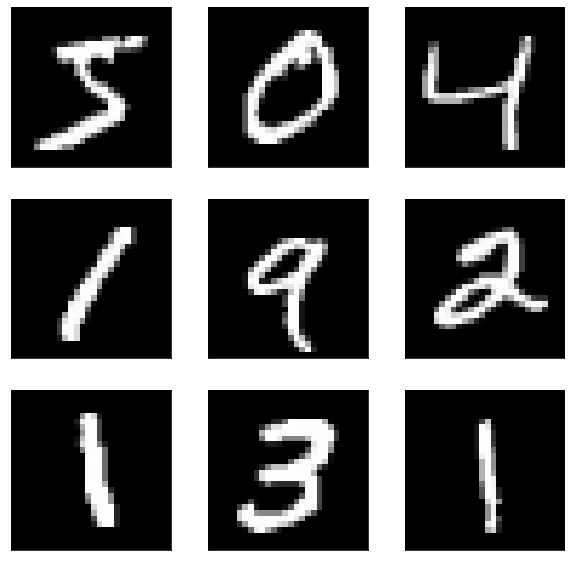

In [10]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')

plt.show()


In [11]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 4)         148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
Total params: 1,198
Trainable params: 1,198
Non-trainable params: 0
______________________________________________________

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(train_images, train_labels, epochs=11, validation_data=(test_images, test_labels))


Epoch 1/11
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0894 - accuracy: 0.9733 - val_loss: 0.0853 - val_accuracy: 0.9746
Epoch 2/11
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0858 - accuracy: 0.9741 - val_loss: 0.0838 - val_accuracy: 0.9757
Epoch 3/11
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.0799 - val_accuracy: 0.9738
Epoch 4/11
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0819 - accuracy: 0.9756 - val_loss: 0.0721 - val_accuracy: 0.9776
Epoch 5/11
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0801 - accuracy: 0.9758 - val_loss: 0.0829 - val_accuracy: 0.9734
Epoch 6/11
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.0736 - val_accuracy: 0.9774
Epoch 7/11
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0775 -

El valor predecido es :  6


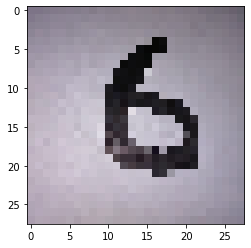

In [34]:
import numpy as np
from keras_preprocessing import image 

images = image.load_img("numero6.jpg", target_size=(28, 28)) #Aqui va la imagen a reconocer 
plt.imshow(images)

x = image.img_to_array(images)
x = tf.image.rgb_to_grayscale(x) #Esta linea es por si la imagen esta a color 
x = np.expand_dims(x, axis=0)
x = x/255.0




predicted=model.predict(x)
a=predicted [0][0]
for i in range (0,10):
    b=predicted [0][i]

print("El valor predecido es : ",np.argmax(predicted[0]))